# Case Study Project - Travel Insurance

Travel Assured is a travel insurance company. Due to the COVID pandemic, they have had to cut their marketing budget by over 50%. It is more important than ever that they advertise in the right places and to the right people. Travel Assured has plenty of data on their current customers as well as people who got quotes but never bought insurance. They want to know if there are differences in the travel habits between customers and non-customers - they believe they are
more likely to travel often (buying tickets from frequent flyer miles) and travel abroad, You will be presenting to the CEO.
### Data
- Age : Numeric, the customer’s age
- Employment Type :  Character, the sector of employment
- GraduateOrNot : Character, whether the customer is a college graduate
- AnnualIncome : Numeric, the customer’s yearly income
- FamilyMembers : Numeric, the number of family members living with the customer
- ChronicDiseases : Numeric, whether the customer has any chronic conditions
- FrequentFlyer : Character, whether a customer books frequent tickets 
- EverTravelledAbroad : Character, has the customer ever travelled abroad
- TravelInsurance : Numeric, whether the customer bought travel insurance

### Table of Contents
- Importing libraries
- Importing data
- Cleaning Data
- Exploratory Data Analysis
- Conclusions 

# Importing libraries

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


# Importing data

In [5]:
df = pd.read_csv('travel_insurance.csv')

In [7]:
# preview the data
df.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0


In [8]:
# check the column names   
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [9]:
print("The shape of the DataFrame is = {}".format(df.shape))

The shape of the DataFrame is = (1987, 9)


# Cleaning Data

In [10]:
#Check missing values 
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [11]:
df.duplicated().sum()

738

In [12]:
df.drop_duplicates(inplace =True)

# Exploratory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1249 non-null   int64 
 1   Employment Type      1249 non-null   object
 2   GraduateOrNot        1249 non-null   object
 3   AnnualIncome         1249 non-null   int64 
 4   FamilyMembers        1249 non-null   int64 
 5   ChronicDiseases      1249 non-null   int64 
 6   FrequentFlyer        1249 non-null   object
 7   EverTravelledAbroad  1249 non-null   object
 8   TravelInsurance      1249 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 97.6+ KB


In [15]:
df.describe().round(2)

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1249.00,1249.00,1249.00,1249.00,1249.00
mean,29.76,934547.64,4.89,0.33,0.39
std,2.92,360729.28,1.76,0.47,0.49
min,25.00,300000.00,2.00,0.00,0.00
25%,28.00,600000.00,4.00,0.00,0.00
50%,29.00,900000.00,5.00,0.00,0.00
75%,32.00,1200000.00,6.00,1.00,1.00
max,35.00,1800000.00,9.00,1.00,1.00


Didn't  bought insurance    766
bought insurance            483
Name: TravelInsurance, dtype: int64

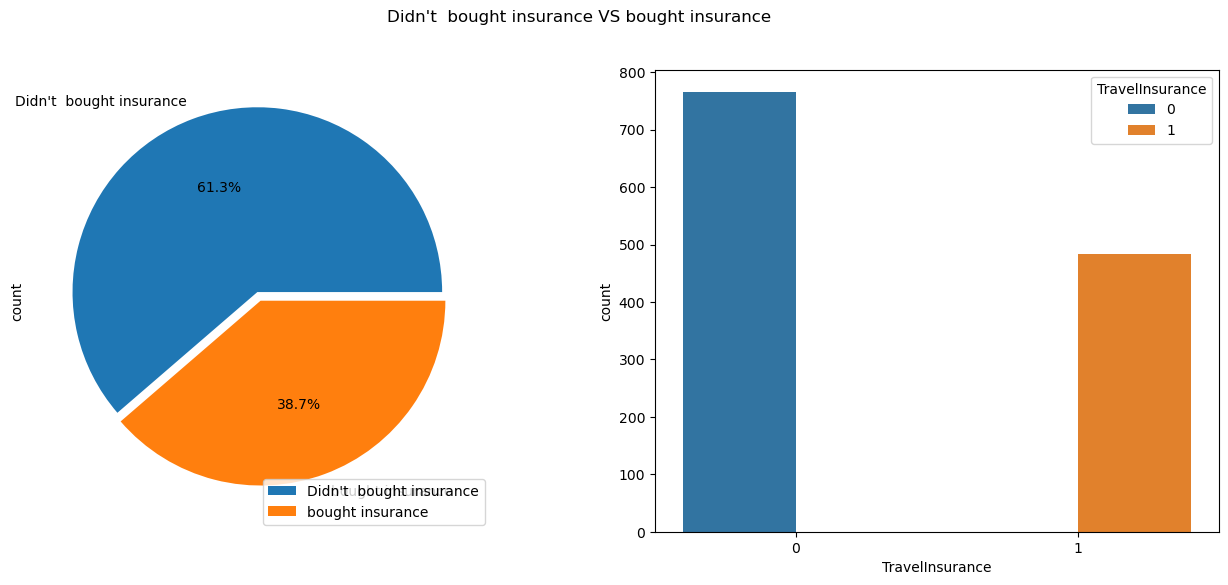

In [17]:
total_Noshow=df['TravelInsurance'].value_counts()
total_Noshow.index=["Didn't  bought insurance","bought insurance"]
f,ax=plt.subplots(1,2,figsize=(16,6))
total_Noshow.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('count')
ax[0].legend()

sns.countplot(x='TravelInsurance',hue="TravelInsurance",data=df,ax=ax[1])
f.suptitle("Didn't  bought insurance VS bought insurance")
total_Noshow

- We note that the customers who Didn't bought insurance (61.3%) rate is large

# Average age of those who bought Travel Insurance.

Text(0.5, 0.98, "bought insurance Age Distribution vs Not  Didn't bought insurance Age Distribution")

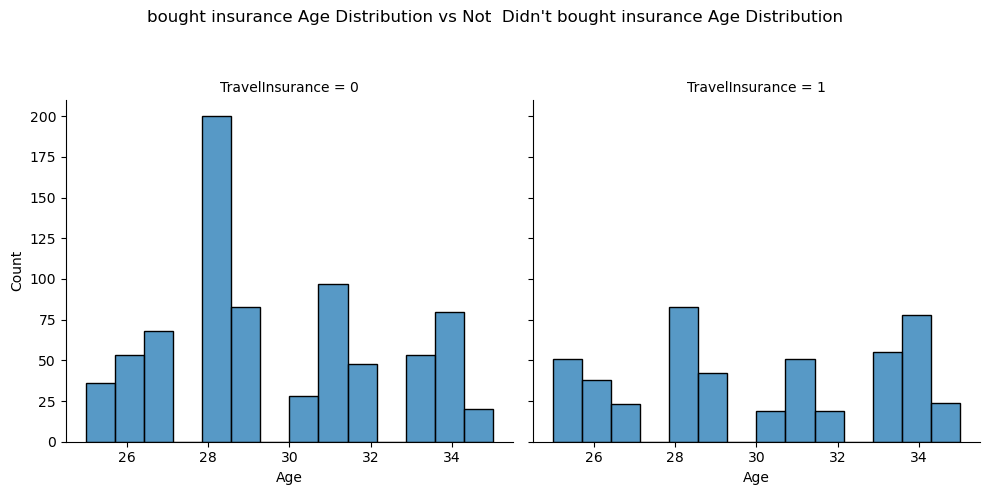

In [19]:
rel =sns.displot(x="Age", col="TravelInsurance",data=df)
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle("bought insurance Age Distribution vs Not  Didn't bought insurance Age Distribution")

In [21]:
Age_mean=df[['TravelInsurance','Age']].groupby('TravelInsurance').mean().round(0)
Age_mean.index=["the average age of those who Didn't bought insurance : ",'the average age of those who bought insurance :']
Age_mean

,Age
the average age of those who Didn't bought insurance :,30.0
the average age of those who bought insurance :,30.0


-  Note: It's about the same rate, I don't think age has anything to do with buying Travel insurance
-  Note:The average age is the same whether you buy or not
-  Note: Almost the same distribution, except that people at the age of 28 are the least in the purchase process, despite their large number

#  Does the Employment Type have anything to do with whether he will buy or not ?

#### First, let's get to know the types of employment and what is the most common type

Private Sector/Self Employed    876
Government Sector               373
Name: Employment Type, dtype: int64

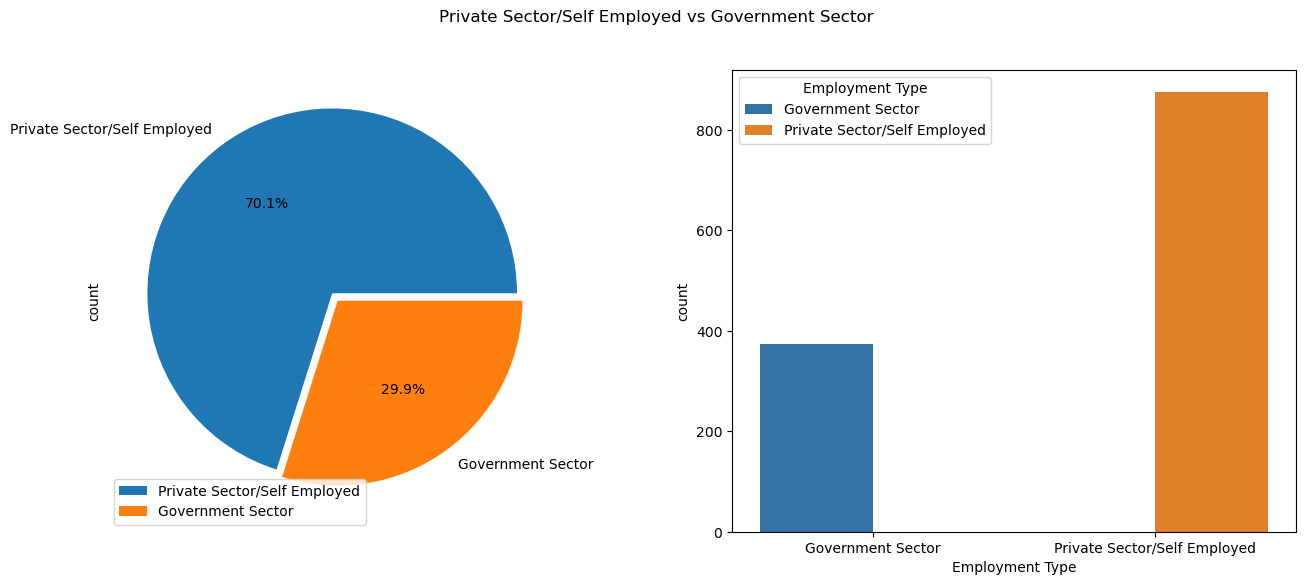

In [25]:
DFEmployment=df['Employment Type'].value_counts()

f,ax=plt.subplots(1,2,figsize=(16,6))
DFEmployment.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('count')
ax[0].legend()

sns.countplot(x='Employment Type',hue="Employment Type",data=df,ax=ax[1])
f.suptitle("Private Sector/Self Employed vs Government Sector")
DFEmployment

-  Note: We note that the people their Employment Type is Private Sector/Self Employed Their ratio (70.1%) is more.
####  let's see if Employment Type has anything to do with the purchase 

Text(0.5, 1.0, 'Employment Type vs Travel Insurance')

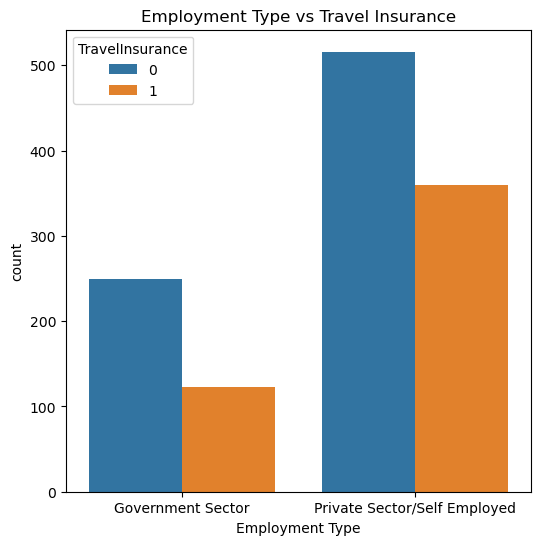

In [26]:
f,ax=plt.subplots(figsize=(6,6))
sns.countplot(x='Employment Type',hue="TravelInsurance",data=df)
plt.title("Employment Type vs Travel Insurance")

In [27]:
df.groupby(['Employment Type','TravelInsurance'])['Employment Type'].count() / df.groupby('Employment Type')['Employment Type'].count()

Employment Type               TravelInsurance
Government Sector             0                  0.670241
                              1                  0.329759
Private Sector/Self Employed  0                  0.589041
                              1                  0.410959
Name: Employment Type, dtype: float64

- Note: People whose Employment Type is Private Sector/Self Employed has a greater percentage in the purchase process, as the percentage of their purchase is 0.410959, while the percentage of their purchase whose  work Government Sector is 0.329759

### Does being a graduate or not have anything to do with whether or not he buys?
####  First, let's get to know  how many Graduate Or Not

Yes    1047
No      202
Name: GraduateOrNot, dtype: int64

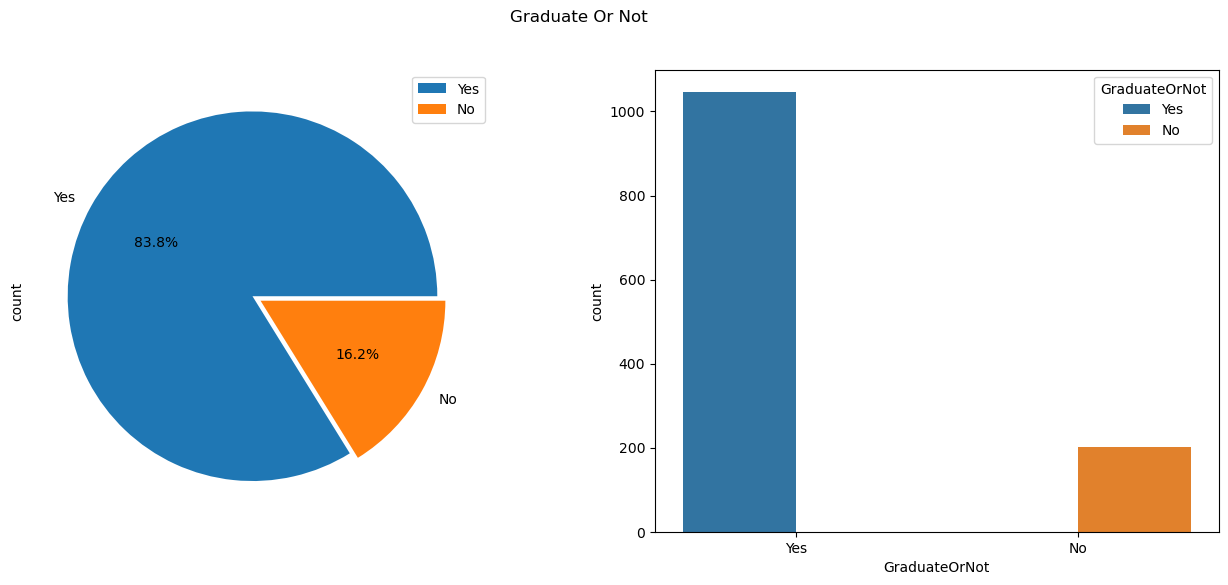

In [29]:
DFGraduateOrNot=df['GraduateOrNot'].value_counts()

f,ax=plt.subplots(1,2,figsize=(16,6))
DFGraduateOrNot.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('count')
ax[0].legend()

sns.countplot(x='GraduateOrNot',hue="GraduateOrNot",data=df,ax=ax[1])
f.suptitle("Graduate Or Not")
DFGraduateOrNot

-  Note: We note that the people Graduate Their ratio (83.8%) is more.
####  let's see if Graduate Or Not has anything to do with the purchase 

Text(0.5, 1.0, 'GraduateOrNot vs Travel Insurance')

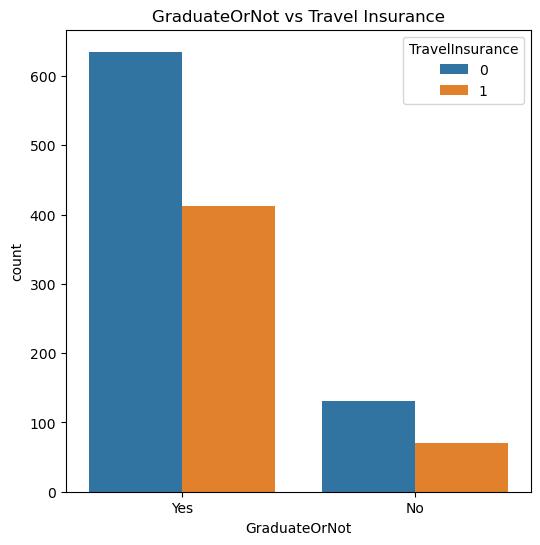

In [30]:
f,ax=plt.subplots(1,figsize=(6,6))
sns.countplot(x='GraduateOrNot',hue="TravelInsurance",data=df)
plt.title("GraduateOrNot vs Travel Insurance")

In [32]:
df.groupby(['GraduateOrNot','TravelInsurance'])['GraduateOrNot'].count() / df.groupby('GraduateOrNot')['GraduateOrNot'].count()

GraduateOrNot  TravelInsurance
No             0                  0.648515
               1                  0.351485
Yes            0                  0.606495
               1                  0.393505
Name: GraduateOrNot, dtype: float64

- Note: Regardless of whether a person is a graduate or not, you find that the probability of their purchase is equal, as their purchase rates are equal.

### Let's explore annual income data for people to know the impact of income on the ability to buy travel insurance

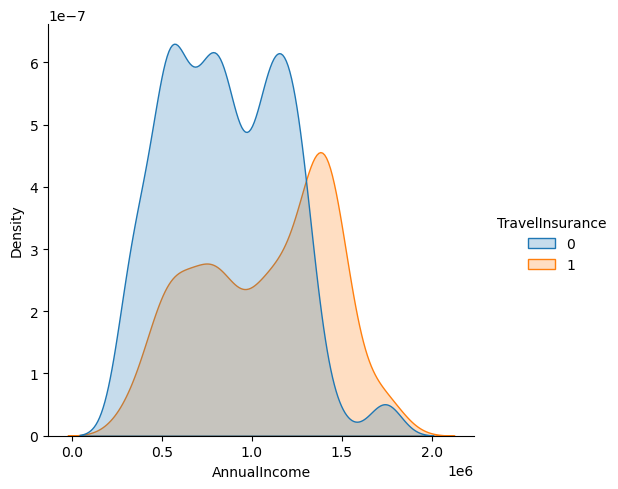

In [34]:
sns.displot(df, x="AnnualIncome", hue="TravelInsurance", kind="kde", fill=True)

- It clearly shows, that those with higher annual incomes are superior at buying travel insurance. Let's be sure.

0.29391272933756296

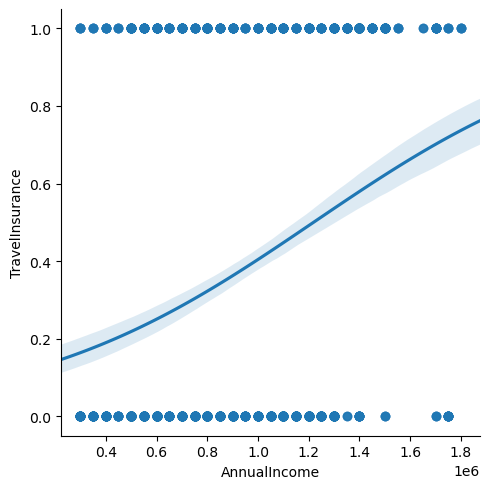

In [35]:
sns.lmplot(x="AnnualIncome", y="TravelInsurance", data=df,   logistic=True, truncate=False)
display(df['TravelInsurance'].corr(df['AnnualIncome']))

- There is a positive and moderate  relationship

In [36]:
df['AnnualIncome'].median()

900000.0

Text(0.5, 0.98, 'high Annual Income vs low Annual Income')

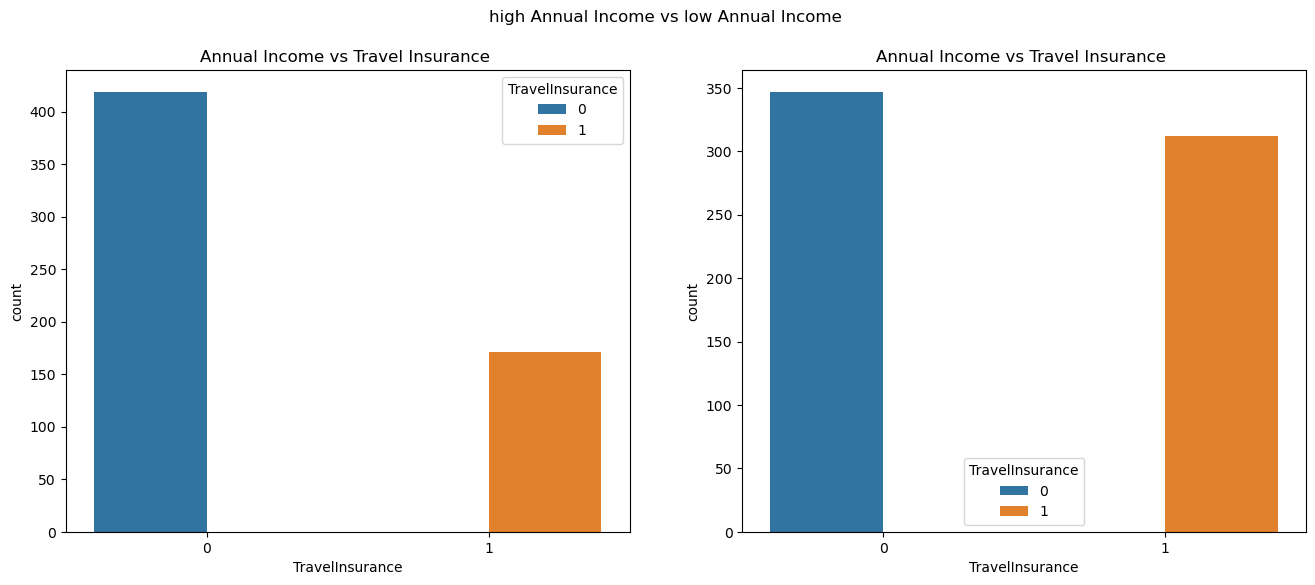

In [37]:
low_AnnualIncome=df[(df['AnnualIncome']<900000)]
high_AnnualIncome=df[(df['AnnualIncome']>=900000)]
f,ax=plt.subplots(1,2,figsize=(16,6))
sns.countplot(x='TravelInsurance',hue='TravelInsurance',data=low_AnnualIncome,ax=ax[0])
ax[0].set_title("Annual Income vs Travel Insurance ")

sns.countplot(x='TravelInsurance',hue='TravelInsurance',data=high_AnnualIncome,ax=ax[1])
ax[1].set_title("Annual Income vs Travel Insurance ")
f.suptitle("high Annual Income vs low Annual Income")

- The number of people who do not buy travel insurance is approximately equal, whether their income is high or low, but see the difference who buy travel insurance, the number is clearly higher for high-income people.
- We conclude that high-income people buy more, so we should care about that

### Does the number of family members affect me if he buys insurance or not?

Text(0.5, 1.0, 'Family Members vs Travel Insurance')

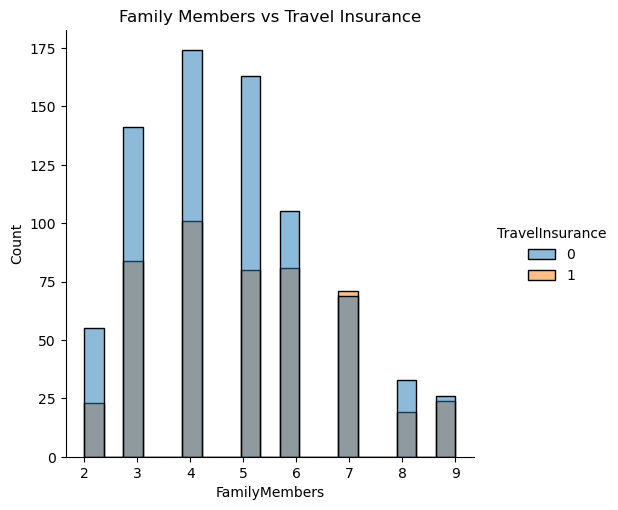

In [39]:
sns.displot(df, x="FamilyMembers", hue="TravelInsurance")
plt.title('Family Members vs Travel Insurance')

- Both distributions are similar, let's go deeper

- We settled it early, when the number of family members was more than five, the proportion of buyers increases and approached 50 percent.

Not suffering    833
suffering        416
Name: ChronicDiseases, dtype: int64

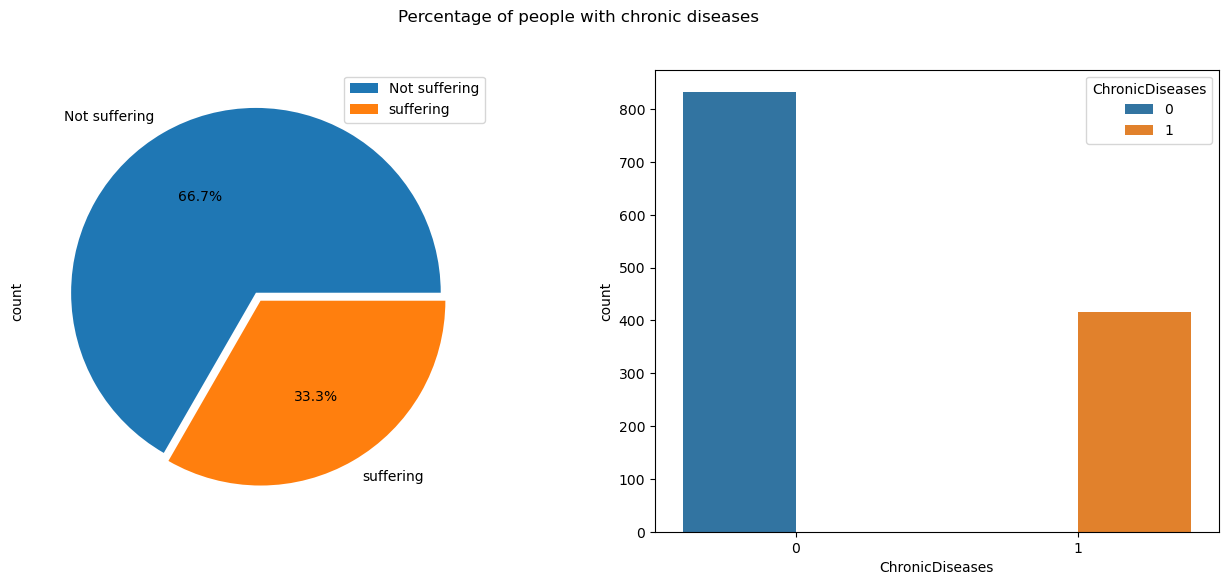

In [40]:
dfChronicDiseases=df['ChronicDiseases'].value_counts()
dfChronicDiseases.index=["Not suffering","suffering"]

f,ax=plt.subplots(1,2,figsize=(16,6))
dfChronicDiseases.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('count')
ax[0].legend()

sns.countplot(x='ChronicDiseases',hue="ChronicDiseases",data=df,ax=ax[1])
f.suptitle("Percentage of people with chronic diseases")
dfChronicDiseases

Text(0.5, 1.0, 'Chronic Diseases vs Travel Insurance')

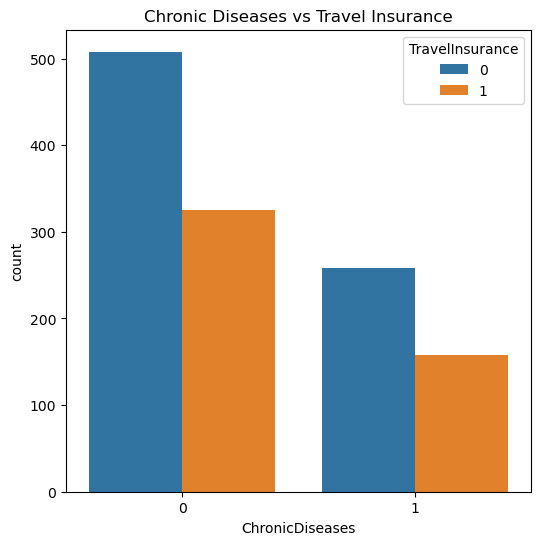

In [41]:
f,ax=plt.subplots(1,figsize=(6,6))
sns.countplot(x='ChronicDiseases',hue="TravelInsurance",data=df)
plt.title("Chronic Diseases vs Travel Insurance")

In [42]:
df.groupby(['ChronicDiseases','TravelInsurance'])['ChronicDiseases'].count() / df.groupby('ChronicDiseases')['ChronicDiseases'].count()

ChronicDiseases  TravelInsurance
0                0                  0.609844
                 1                  0.390156
1                0                  0.620192
                 1                  0.379808
Name: ChronicDiseases, dtype: float64

Note: Regardless of whether a person is suffering or not,  their purchase rates are equal.

Text(0.5, 1.0, 'Frequent Flyer vs Travel Insurance')

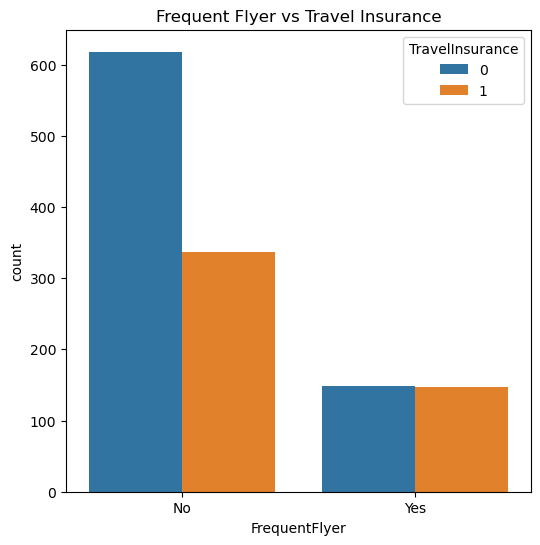

In [43]:
f,ax=plt.subplots(1,figsize=(6,6))
sns.countplot(x='FrequentFlyer',hue="TravelInsurance",data=df)
plt.title("Frequent Flyer vs Travel Insurance")

In [44]:
df.groupby(['FrequentFlyer','TravelInsurance'])['FrequentFlyer'].count() / df.groupby('FrequentFlyer')['FrequentFlyer'].count()

FrequentFlyer  TravelInsurance
No             0                  0.647799
               1                  0.352201
Yes            0                  0.501695
               1                  0.498305
Name: FrequentFlyer, dtype: float64

- We can clearly say that if a person Frequent Flyer, the probability of buying travel insurance is greater.

Text(0.5, 1.0, 'Ever Travelled Abroad vs Travel Insurance')

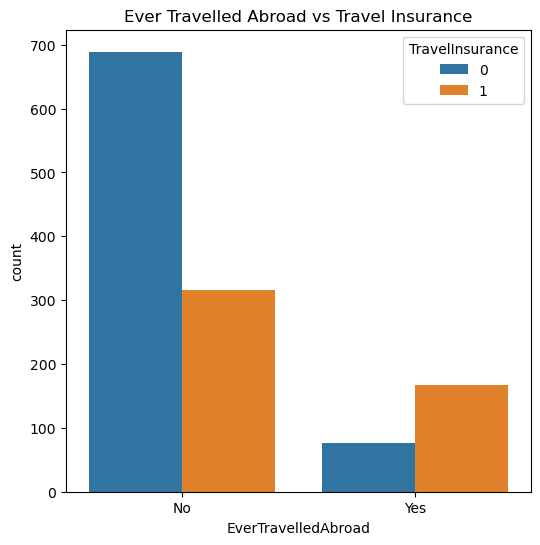

In [45]:
f,ax=plt.subplots(1,figsize=(6,6))
sns.countplot(x='EverTravelledAbroad',hue="TravelInsurance",data=df)
plt.title("Ever Travelled Abroad vs Travel Insurance")


In [46]:
df.groupby(['EverTravelledAbroad','TravelInsurance'])['EverTravelledAbroad'].count() / df.groupby('EverTravelledAbroad')['EverTravelledAbroad'].count()

EverTravelledAbroad  TravelInsurance
No                   0                  0.685572
                     1                  0.314428
Yes                  0                  0.315574
                     1                  0.684426
Name: EverTravelledAbroad, dtype: float64

- Well, the matter is very clear here for the customers who traveled abroad because of their desire to buy travel insurance more than others, Their ratio is 0.7 Approximately

# Conclusions
- We note that the customers who Didn't bought insurance (61.3%) rate is large
- I don't think age has anything to do with buying Travel insurance
- The customer's type of employment is the private sector / self-employed and their percentage is (70.1%), where the percentage of their purchases is 0.410959, while the percentage of their purchases in the government sector is 0.329759, so we must give this category some attention in our Marketing campaign.
- that high-income customer buy travel insurance more, so we should care about that
- When Customer is Frequent Flyer, the probability of buying travel insurance is greater.
- Customers who traveled abroad want to buy travel insurance more than others, approximately 0.7